## Chebyshev's inequality program

In [33]:
# imports
import numpy as np
from scipy.stats import norm #normは正規分布
import matplotlib.pyplot as plt

## variables
# X scale
X = np.arange(0, 100, 0.1)

# Y scale
# pdfは, rvsが確率密度関数
# E[x]:50, V[x]:10^2
Ex = 50
Vx = 100
Y_pdf = norm.pdf(X, Ex, 10)
Y_rvs = norm.rvs(loc=Ex, scale=10, size=len(X))

# 非負の実数ε
epsilon = 20

### Calc Chebyshev's inequality program

In [34]:
def Chebyshev():
    # calc right-side
    chev = Vx/epsilon/epsilon

    # calc left-side
    flag = 0
    for loop in Y_rvs:
        if loop <= Ex-epsilon or Ex+epsilon <= loop:
            flag +=1

    # check
    print("Pr((x-Ex)^2) = "+str(flag/len(Y_rvs))+" <= "+str(chev)+" = V[x]/ε^2")
    
    # return right-side
    return chev

if "__main__" in __name__:
    _ = Chebyshev()
    print(_)

Pr((x-Ex)^2) = 0.038 <= 0.25 = V[x]/ε^2
0.25


### plot graph

In [35]:
# Y_rvs の 10刻みの棒グラフ用の変数
size = np.arange(0,10,1)
Pr10 = np.full(len(size), 0.)

for loop in size:
    for Pr in Y_rvs:
        if 10*loop <= Pr < 10*(loop+1):
            Pr10[loop] += 1/len(Y_rvs)
print("0     1     2     3     4     5     6     7     8     9     ")
print(Pr10)

0     1     2     3     4     5     6     7     8     9     
[0.    0.001 0.016 0.132 0.324 0.355 0.151 0.018 0.003 0.   ]


Pr((x-Ex)^2) = 0.038 <= 0.25 = V[x]/ε^2


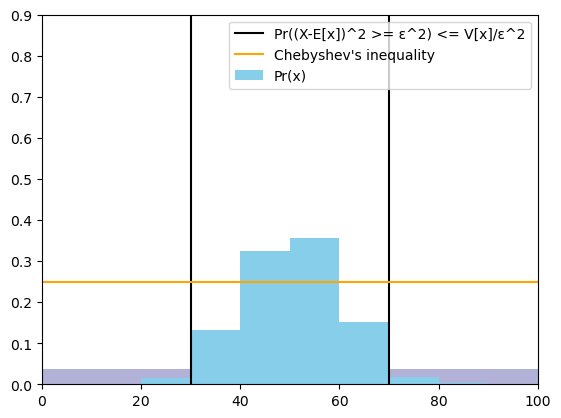

In [36]:
## #グラフの表示
# 基本の設定
plt.xlim(0,100)
plt.ylim(0,0.9)

# aの直線
plt.axvline(70, color='black', label="Pr((X-E[x])^2 >= ε^2) <= V[x]/ε^2")
plt.axvline(30, color='black')

# 確率分布 (10刻み)
plt.bar(60+20, Pr10[0]+Pr10[1]+Pr10[2]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(40-20, Pr10[0]+Pr10[1]+Pr10[2]+Pr10[7]+Pr10[8]+Pr10[9], 40, color='navy', alpha=0.3)
plt.bar(size*10+5, Pr10, 10, color='skyblue', label="Pr(x)")

# チェビシェフの不等式
plt.axhline(Chebyshev(), color='orange', label="Chebyshev's inequality")

# 表示
plt.legend()
plt.show()